# Solving Schwefel function using Tabu Search

The [Schwefel Function](https://www.sfu.ca/~ssurjano/schwef.html) is complex, with many local minima. The plot shows the two-dimensional form of the function.

Formula: $f(x)=418.9829d+\sum_{i=1}^{d}x_isin(\sqrt|x_i|)$ , $x_i\in [-500,500]$

Dimensions: d

Input Domain: The function is usually evaluated on the hypercube xi ∈ [-500, 500], for all i = 1, …, d.

Global Minimum: $f(x^*)=0$, at $x^* = (420.9687,…,420.9687)$

In [1]:
from optalgotools.algorithms import TabuSearch
from optalgotools.problems import ProblemBase, ContinuousFunctionBase

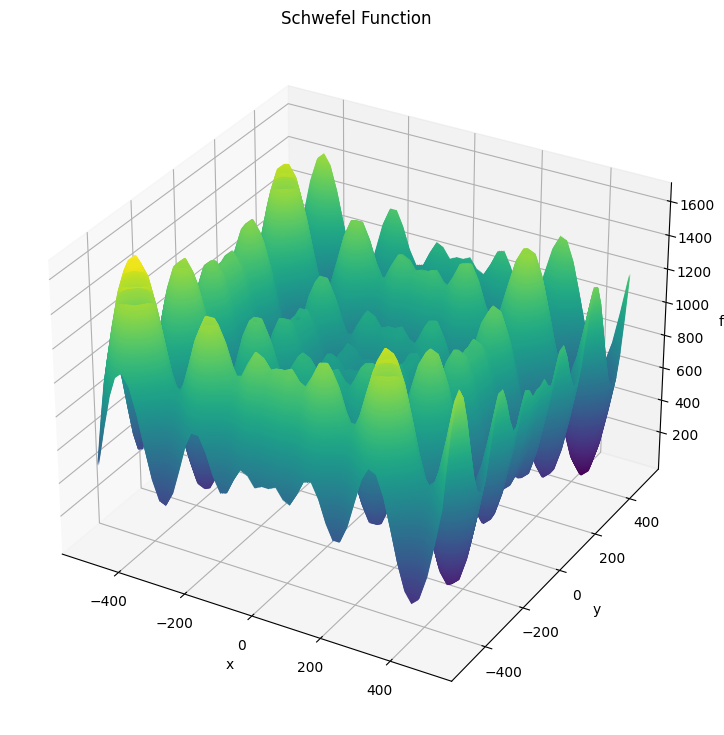

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d 
import numpy as np

# define the objective function
def Schwefel(x,y):
       return 418.9829*2 - x*np.sin(np.sqrt(abs(x)))-y*np.sin(np.sqrt(abs(y)))

X=np.linspace(-500,500)
Y=np.linspace(-500,500)
    
x,y=np.meshgrid(X,Y)
f=Schwefel(x,y)

fig =plt.figure(figsize=(9,9))
ax=plt.axes(projection='3d')
ax.contour3D(x,y,f,450)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f')
ax.set_title('Schwefel Function')
plt.show()

In [3]:
# define the bounds
Schwefel_bounds = np.asarray([[-500, 500], [-500, 500]])

#create a continous function object
Schwefel_obj = ContinuousFunctionBase(Schwefel, Schwefel_bounds)

# define TS solver. Adding debug = 1 to print initial and final solution
ts = TabuSearch(max_iter=100, tabu_tenure=5, neighbor_size=50, use_aspiration=True, aspiration_limit=2, use_longterm=False, debug=1)
# run the solver
ts.run(Schwefel_obj)

Tabu search is initialized:
current value = 802.7732888365946
Tabu search is done: 
curr iter: 100, curr best value: 612.0396292192296, curr best: sol: [-25.88308165 203.80962739], found at iter: 39
